# Ejercicio 4
## Integrantes 
*
*
*
*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns

In [2]:
plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (8,8),
    'savefig.dpi': 120
})

In [3]:
def calcular_fft( x_c, Fs, N, zero_padding=None ):
    if type( N ) != int:
        resultado_fft = {
            'X': [],
            'shift_X': [],
            'freq': [],
            'N': []
        }
        for N_ in N:
            iteracion_N = calcular_fft( x_c, Fs, N_, zero_padding=zero_padding )
            resultado_fft['N'].append( N_ )
            for key in iteracion_N:
                resultado_fft[ key ].append( iteracion_N[ key ] )
    else:
        x = lambda n: x_c( n / Fs )
        n = np.arange( 0, N )
        
        if( not zero_padding ):
            zero_padding = N
        
        X = fft( x(n), zero_padding ) / Fs
        shift_X = fftshift( X )
        freq =  fftshift( fftfreq( zero_padding )  )* Fs
        
        resultado_fft = {
            'X': X,
            'shift_X': shift_X,
            'freq': freq
        }
    return resultado_fft
        

In [4]:
def calcular_fft_fs( x_c, Fs, N, zero_padding=None ):
    if type( Fs ) != int:
        resultado_fft = {
            'fft': [],
            'Fs': []
        }
        for Fs_ in Fs:
            resultado_fft['fft'].append( calcular_fft( x_c, Fs_, N, zero_padding=zero_padding ) )
            resultado_fft['Fs'].append( Fs_ )
            
    else:
        resultado_fft = {
            'fft': calcular_fft( x_c, Fs, N, zero_padding=zero_padding )
        }
    return resultado_fft

In [5]:
escalon = lambda t: np.piecewise( t, t>=0,[1, 0] )
x_c = lambda t: -escalon( 3-t ) * escalon( t )
envolvente = lambda f: -3 * np.exp( -3j*f ) *np.sinc( 3*f )

## d)

In [6]:
Fs = [ (i+1)*.01 for i in range( 1000 ) ]

X = []

for Fs_ in Fs:
    X.append( calcular_fft(x_c, Fs_, int( 3*Fs_ )+10, 1024)['X'] )


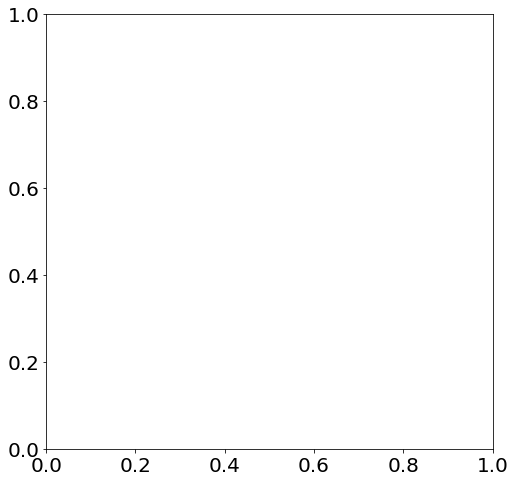

In [7]:
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    ax.plot( X[i] )
    ax.grid()

In [8]:
graficar = input('desea graficar?: ')
if graficar=='si':
    anim = FuncAnimation(fig, animate, frames=1000)
    anim.save('./animacion_d.mp4', writer='ffmpeg', fps=60)

desea graficar?: no


In [9]:
Fs = [ .5, 1, 10 ]
fft_d = calcular_fft_fs(x_c, Fs, 700, 1024 )

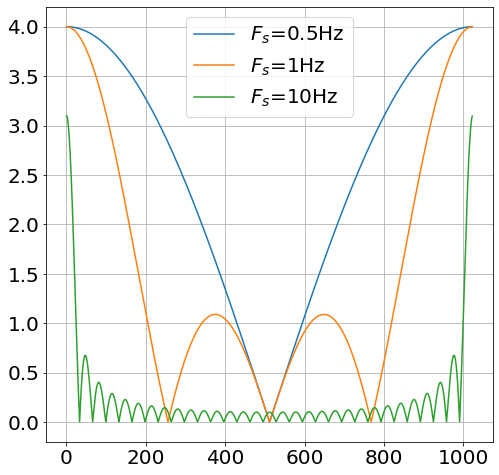

In [10]:
for i in range( len( Fs ) ):
    X = np.abs(fft_d['fft'][i]['X'])
    plt.plot( X , label='$F_s$=%sHz'%(Fs[i]) )
plt.legend()
plt.grid()
plt.savefig( './Img/punto_4_d.png' )

## e)

In [11]:
Ns = [ 1000, 10 ]
fft_e = calcular_fft( x_c, 3, Ns)

/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


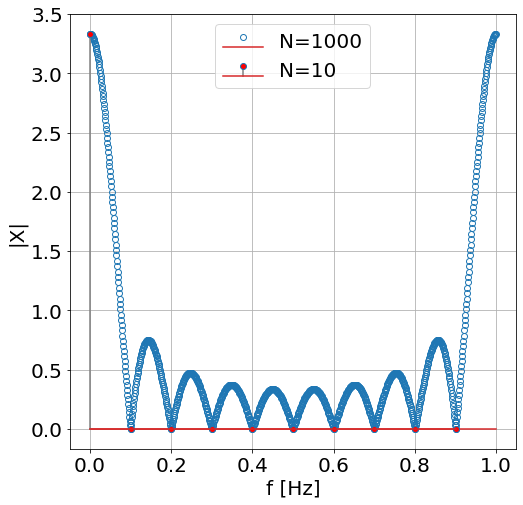

In [12]:
c = ['none', 'gray']
markerface = ['none', 'red']
for i in range( len( Ns ) ):
    X = np.abs(fft_e['X'][i])
    f = np.arange( 0, len( X ), 1 ) / Ns[i]
    markerline, stemlines, baseline = plt.stem(f, X , label='N=%s'%(Ns[i]), linefmt=c[i])
    markerline.set_markerfacecolor(markerface[i])
    plt.xlabel( 'f [Hz]' )
    plt.ylabel( '|X|' )
plt.legend()
plt.grid()
plt.savefig( './Img/punto_4_e.png' )

## f)

In [85]:
Fs = 3
Ns = [ 10, 11]

fft_f = calcular_fft( x_c, Fs, Ns )
x_m = lambda n: -escalon( n )*escalon( 3*Fs - n )
envolvente_teorica = lambda f: np.sum( [ x_m(n) * np.exp( -1j* 2*np.pi*f*n/Fs ) for n in range( 0, int(3*Fs+10) ) ], axis=0 )



/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/lautaro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


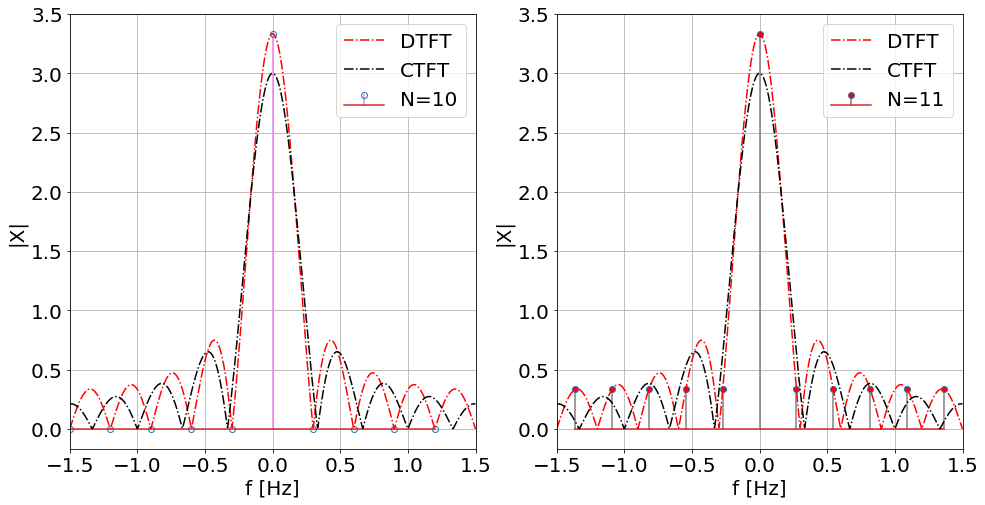

In [86]:
fig, axs = plt.subplots( 1, 2, figsize=(16, 8) )

c = [ 'violet', 'gray' ]
for i in range( len( Ns ) ):
    X = np.abs(fft_f['shift_X'][i])
    f = fft_f['freq'][i]
    markerline, stemlines, baseline = axs[i].stem(f, X , label='N=%s'%(Ns[i]),  linefmt=c[i])
    markerline.set_markerfacecolor(markerface[i])
    
    fs = np.linspace( -1.5, 1.5, 1000 )
    N = Ns[i]
    axs[i].plot( fs, np.abs(envolvente_teorica(fs))/Fs, 'r-.' ,label='DTFT' )
    axs[i].plot( fs, np.abs( envolvente(fs) ), 'k-.',label='CTFT' )
    axs[i].set_xlabel( 'f [Hz]' )
    axs[i].set_ylabel( '|X|' )
    
    axs[i].set_xlim( [-1.5, 1.5] )
    axs[i].legend()
    axs[i].grid()
plt.savefig( './Img/punto_4_f.png' )

In [94]:
Fss = [ (i+1)*.1 for i in range( 100 ) ]
X = []
f = []
envolvente_dtft = []
fs = np.linspace( -1.5, 1.5, 1000 )
envolvente_evalua = np.abs(envolvente( fs ))
for Fs in Fss:
    fft_animation = calcular_fft( x_c, Fs, int( 3*Fs+10 ) )
    X.append( np.abs(fft_animation['shift_X']) )
    f.append( fft_animation['freq'] )
    envolvente_dtft.append( np.abs(envolvente_teorica( fs ))/Fs )

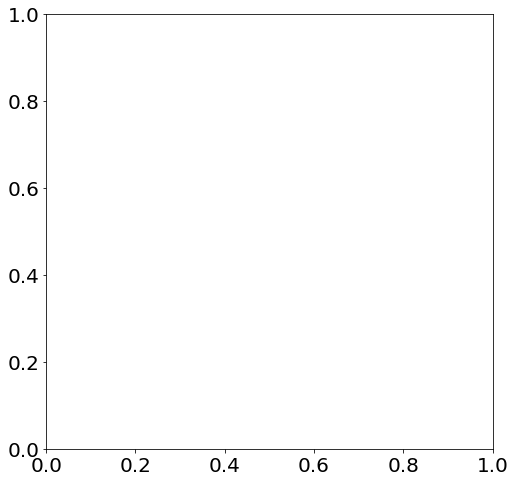

In [95]:
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    ax.stem( f[i], X[i], label='Aprox' )
    ax.plot( fs, envolvente_evalua, 'k-.' ,label='CTFT' )
    ax.plot( fs, envolvente_dtft[i], 'r-.' ,label='DTFT' )
    ax.legend()
    ax.set_xlim( [-1.5, 1.5] )
    ax.set_ylim( [-.3, 5] )
    ax.set_xlabel( 'f [Hz]' )
    ax.set_ylabel( '|X|' )   
    ax.grid()

In [98]:
graficar = input('desea graficar?: ')
if graficar=='si':
    anim = FuncAnimation(fig, animate, frames=100)
    anim.save('./animacion_f.mp4', writer='ffmpeg', fps=10)

desea graficar?: no


## g)

In [15]:
x_1 = lambda t: t * escalon( t ) * escalon( 4-t ) + ( 10-t )*escalon( t-5 )*escalon(10-t)
x_2 = lambda t: escalon( t+2 )*escalon( 2-t )
# se trabaja con -0.5 como complejo
x_3 = lambda t: (complex( -0.5 ))**t * escalon( t )

X_1 = lambda f: 

In [16]:
Fs = 10
fft_g_1 = calcular_fft( x_1, Fs, Fs*12, 1024 )
fft_g_2 = calcular_fft( x_2, Fs, Fs*6, 1024)
fft_g_3 = calcular_fft( x_3, Fs, Fs*16, 1024 )

In [17]:
def graficar_CTFT( x_c, Fs, N, N_neg=0, zero_padding=None, path=None ):
    x = lambda t: x_c( t - N_neg )
    CTFT = calcular_fft( x, Fs, N+N_neg, zero_padding=zero_padding )
    
    fig = plt.figure()
    ax = fig.gca()
    
    ax.plot(  ,np.abs(CTFT['X']) )
    ax.grid()
    if( path ):
        plt.savefig( path )

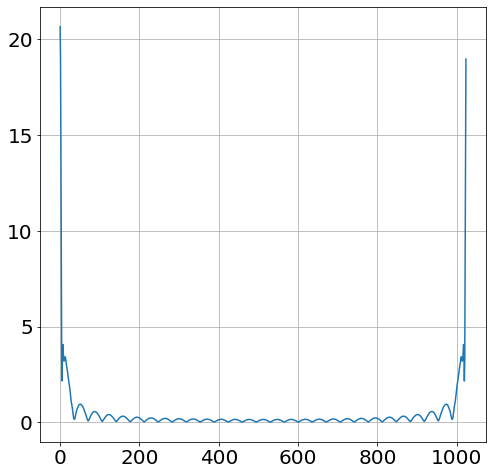

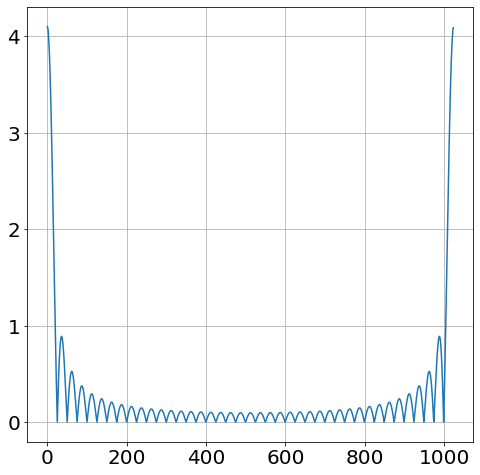

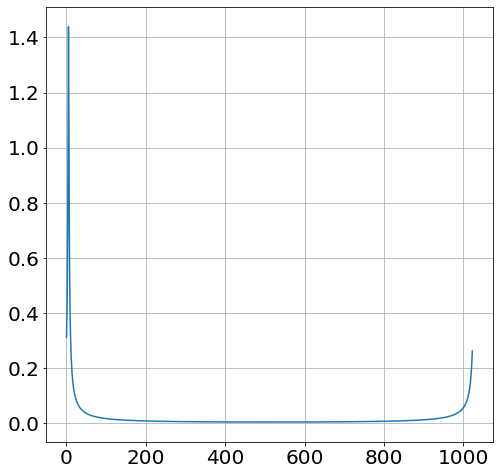

In [18]:
Fs_1 = 30
Fs_2 = 10
Fs_3 = 100

graficar_CTFT( x_1, Fs_1, 15*Fs_1, zero_padding=1024, path='./Img/punto_4_h_1.png' )
graficar_CTFT( x_2, Fs_2, 10*Fs_2, N_neg=4 ,zero_padding=1024, path='./Img/punto_4_h_2.png' )
graficar_CTFT( x_3, Fs_3, 20*Fs_3, zero_padding=1024, path='./Img/punto_4_h_3.png' )

In [60]:
n = np.arange( 0, 14 )
len(np.sum( [  np.exp( n )  for i in range(10)], axis=0 ))

14